In [2]:
import os
from pathlib import Path

import ipynbname

primary_path = Path(ipynbname.path()).parent.parent.parent
print("Changing working directory to: ", primary_path)
os.chdir(primary_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Changing working directory to:  /Users/sylvia/dev/aeon


In [12]:
scalar_dir = Path("output/axicombo/0.0/")

scalar_amplitudes = []
scalar_data = []

for directory in scalar_dir.iterdir():
    if directory.is_dir():
        try:
            amplitude = float(directory.name)
        except Exception as e:
            continue
        history_file = directory / "evolve_history.csv"

        if not history_file.is_file():
            continue

        scalar_amplitudes.append(amplitude)
        scalar_data.append(pd.read_csv(history_file))

combo_dir = Path("output/axicombo/1.0/")

combo_amplitudes = []
combo_data = []

for directory in combo_dir.iterdir():
    if directory.is_dir():
        try:
            amplitude = float(directory.name)
        except Exception as e:
            continue
        history_file = directory / "evolve_history.csv"

        if not history_file.is_file():
            continue

        combo_amplitudes.append(amplitude)
        combo_data.append(pd.read_csv(history_file))

36

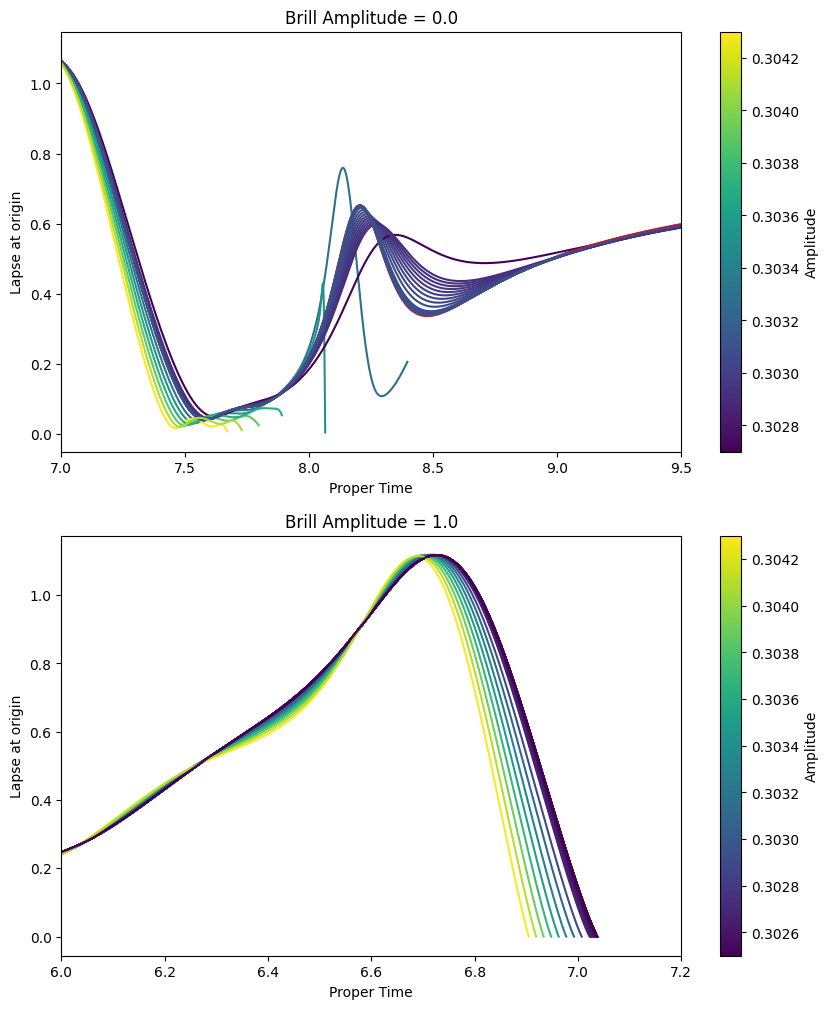

In [19]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

highlight_range = [0.3031, 0.3031001]

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

colormap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=min(scalar_amplitudes), vmax=max(scalar_amplitudes))

for i in range(0, len(scalar_amplitudes)):
    color = colormap(norm(scalar_amplitudes[i]))
    if highlight_range[0] <= scalar_amplitudes[i] and scalar_amplitudes[i] <= highlight_range[1]:
        color = "red"
    axes[0].plot(scalar_data[i]["proper_time"], scalar_data[i]["alpha"], color=color)

sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array(scalar_amplitudes)
cbar = fig.colorbar(sm, ax=axes[0], orientation="vertical")
cbar.set_label("Amplitude")

colormap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=min(combo_amplitudes), vmax=max(combo_amplitudes))

for i in range(0, len(combo_amplitudes)):
    color = colormap(norm(combo_amplitudes[i]))

    axes[1].plot(combo_data[i]["proper_time"], combo_data[i]["alpha"], color=color)

sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array(combo_amplitudes)
cbar = fig.colorbar(sm, ax=axes[1], orientation="vertical")
cbar.set_label("Amplitude")

axes[0].set_title("Brill Amplitude = 0.0")
axes[0].set_xlabel("Proper Time")
axes[0].set_ylabel("Lapse at origin")
axes[0].set_xlim(7.0, 9.5)
# axes[0].set_ylim(0.58, 0.65)


axes[1].set_title("Brill Amplitude = 1.0")
axes[1].set_xlabel("Proper Time")
axes[1].set_ylabel("Lapse at origin")
axes[1].set_xlim(6, 7.2)
plt.show()